### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats

In [7]:
stroop_data = pd.read_csv('stroopdata.csv')

In [8]:
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [9]:
stroop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


 Answer :So after tacking a brief look into the satset we couls se that the independant variable is the type of the test whether it was congruent or incogruent. And the dependant variable is the response time in seconds

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Answer : We want to evaluate the effect on the performance of the participants and see whether the difference in our sample is because of the fact the congruent and incongruent test are significantly different.

μC : The congruent population's response time mean
μI : The incongruent population's response time mean

The proppsed appropriate set of hypotheses :

H0 : The null hypothesis, that the congruent and incongruent populations are not significantly different (μC − μI = 0)
HA : The alternative hypothesis, that the congruent and incongruent populations are significantly different (μC − μI ≠ 0)

In our case:

The sample size is less than 30. (from stroop_data.info())
Therefore, we will conduct a Dependent t-test for Paired Samples.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [10]:
# Perform the analysis here
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


 Answer :The congruent sample has a mean of x̄ = 14.051125 seconds and a standard deviation σ =  3.559358 seconds.
The incongruent sample has a mean of x̄ = 22.015917 seconds and a standard deviation σ =4.797057 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Plot of Stroop effect')

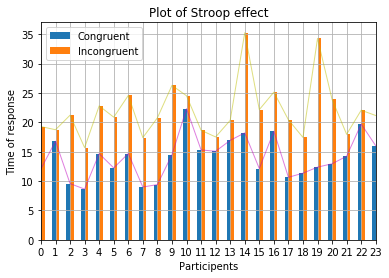

In [16]:
# Build the visualizations here
stroop_data.plot(kind='bar')
stroop_data.Congruent.plot(kind = 'line', color = 'm',label = 'Congruent',linewidth=1,alpha = 0.5,grid = False)
stroop_data.Incongruent.plot(color = 'y',label = 'Incongruent',linewidth=1, alpha = 0.5,grid = True)
plt.xlabel('Participents')              
plt.ylabel('Time of response')
plt.title('Plot of Stroop effect')

Answer : what the plot displays is that when participants were tested in the congruent method they had a much higher response time in comparison to the tests in the incongruent method.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [20]:
# Perform the statistical test here
congurentMean = stroop_data['Congruent'].mean()
incongurantMean = stroop_data['Incongruent'].mean()
# Calculte a point estimate using Avg of differences
EstPoint = congurentMean - incongurantMean
# Calculate Square of Sums of difference of sample means
ssd = sum( ( (stroop_data['Congruent'] - stroop_data['Incongruent']) - EstPoint ) ** 2  )



In [23]:
# Calculate the variance of difference
#vd = ssd / (24 -1)
# but before we have to add a column this way
stroop_data['difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']
sdt = stroop_data.std()
sdd = sdt['difference']
tstatistic = EstPoint / ( sdd / ( 24 ** (1/2) ) )
#Calculate the Degrees of Freedom (24 -1)
df = 23
#Calculating P-Value
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 
# Calculating t critical for an alpha = 0.005 
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

In [26]:
print("Degrees of Freedom : ", df)
print("Alpha- level : a =", alpha)
print("t-critical values :  ", -tcritical, tcritical)
print("t-Statistic(23) : ", tstatistic)
print("p-value : ", pvalue)


Degrees of Freedom :  23
Alpha- level : a = 0.005
t-critical values :   2.80733568377 -2.80733568377
t-Statistic(23) :  -8.02070694411
p-value :  4.10300058571e-08


Answer: the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Answer : after researching this phenomenon i found two diffrent theories that explain it :-
 Selective attention theory  : this theory argues that naming the ctual color of the word presented requires more attention thant reading text (1)
 Speed of Processing theory : This theory argues thate peoplec can read words much more faster than naming colors. This makes it much more difficult to name the color of the word after we had already read the word.
 After performing my own stroop effect experiment, I think i would agree with both theories equally.
 Refrences : https://www.verywellmind.com/what-is-the-stroop-effect-2795832
 http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values